# Ti

**Data Description**

PLAIcraft data has two files: players.csv and sessions.csv

**Table 1. players.csv (196 observations, 9 variables)**
|Variable | Variable type | Description | Issues|
|---|---|---|---|
|experience|chr|Self-ranked Minecraft skill level|Should be “fct", players may overestimate/underestimate skill level<br>★| 
|subscribe|lgl|Whether player subscribed for server activity email updates| Players may have notifications disabled|
|hashedEmail|chr|Account email in hashed format|Players may sign-up multiple times using different emails|
|played_hours|dbl|Total gameplay hours|Includes “away-from-keyboard” time|
|name|chr|Player username|N/A|
|gender|chr|Gender identity|Should be “fct”<br>★|
|age|dbl|Age in years|Only ages 7-99 can participate<br>★|
|individualID|lgl|Unique player identifier for anonymous data tracking|Data missing, cannot analyze|
|organizationName|lgl|Name of organization player is affiliated with|Same as individualID|

★ Players may answer dishonestly. May not reflect changes since account creation.<br><br>

**Table 2. sessions.csv (1535 observations, 5 variables)**
|Variable Name|Variable type|Description|Potential Issues|
|---|---|---|---|
|hashedEmail|chr|see above|see above|
|start_time|chr|Timestamp, player logging into PLAIcraft (day:month:year  hour:minute:second)|Not tidy, improper data type|
|end_time|chr|Timestamp, player exiting PLAIcraft (day:month:year  hour:minute:second)|Same as start_time|
|original_start_time|dbl|Start time, UNIX timestamp format|Not easily human readable, limited precision|
|original_end_time|dbl|End time, UNIX timestamp format|Same as original_start_time|

**Question** <br>
Can time of day accurately predict number of simultaneous PLAIcraft players using KNN regression?
<br>
<br>
Time of day considers start and end times to identify hours of peak player activity. While overlooking seasonal and day-of-the-week trends, it gives overview of number of players online at different times of day.
<br>
<br>
Start and end times are only in sessions.csv, so we'll load but won’t tidy and wrangle players.csv. From sessions.csv, we’ll extract "time_in_hours_past_midnight" from start_time and end_time in “dbl” format for analysis. We’ll remove original_start_time and original_end_time as UNIX timestamps are less precise and hashedEmail since we’re not analyzing individual players.

In [2]:
# Loading libraries

library(tidyverse)
library(repr)
library(lubridate)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
#Loading the players.csv file

players_url <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players_data <- read_csv(players_url)

players_data

# Extra notes (not part of written report):
# As explained in the written report, we will not be proceeding with further tidying or wrangling of this file.
# I loaded this file in part to show that the entire dataset can be loaded into R.

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,NA,NA
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,NA,NA
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,NA,NA


In [4]:
# Loading the sessions.csv file

sessions_url <- "https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB"
sessions_data <- read_csv(sessions_url)

sessions_data

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [5]:
# Tidying and wrangling the sessions.csv data

active_player_counts <- sessions_data |>

    # Converting non-UNIX timestamps to standard dttm format
    mutate(start_time = as.POSIXct(start_time, format = "%d/%m/%Y %H:%M"),
           end_time = as.POSIXct(end_time,format = "%d/%m/%Y %H:%M")) |>

    # Selecting relevant columns
    select(start_time, end_time) |>

    # Counting the number of occurrences of each combination of actions (entry or exit) at each time point 
    pivot_longer(cols = c(start_time, end_time),
                names_to = "action",
                values_to = "time") |>
    
    drop_na(time) |>

    mutate(action = case_when(
          action == "start_time" ~ "entry",
          action == "end_time" ~ "exit")) |>

    group_by(time, action) |>
    summarize(count = n(), .groups = "drop") |>

    # Finding running total number of players at each timestamp
    pivot_wider(names_from = action, 
                values_from = count,
                values_fill = 0) |>

    mutate(total_active_players = cumsum(entry) - cumsum(exit))


# Extracting hours, minutes, and seconds from timestamp (time) and converting to "time_in_hours_past_midnight" 
# to make tidy for the purposes of this analysis
player_counts_by_time <- active_player_counts |>
    mutate(hour = hour(time),
           minute_in_hours = minute(time)/60,
           second_in_hours = second(time)/3600,
                                          
           time_in_hours_past_midnight = hour + minute_in_hours + second_in_hours) |>

    select(time_in_hours_past_midnight, total_active_players)


player_counts_by_time

time_in_hours_past_midnight,total_active_players
<dbl>,<int>
9.4500000,1
9.5166667,0
9.5833333,1
10.2666667,0
20.9333333,1
22.0666667,0
22.4000000,1
23.5500000,0
0.2833333,1


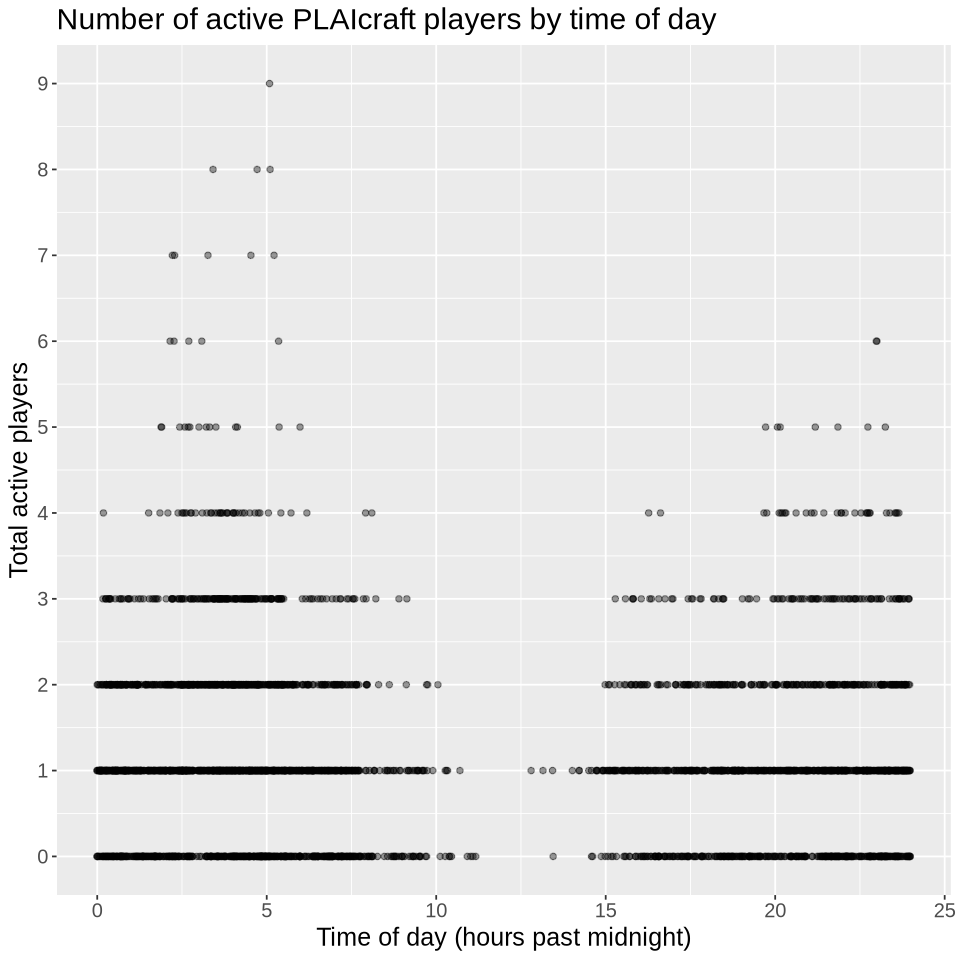

In [6]:
# Visualizing total active players by time of day

options(repr.plot.width = 8, repr.plot.height = 8)

sessions_plot <- player_counts_by_time |>
    ggplot(aes(x = time_in_hours_past_midnight, y = total_active_players)) +
    geom_point(alpha = 0.4) +
    labs(x = "Time of day (hours past midnight)",
         y = "Total active players",
         title = "Number of active PLAIcraft players by time of day") +
    scale_y_continuous(breaks = seq(0, max(player_counts_by_time), by = 1)) +
    theme(text = element_text(size = 15))

           
sessions_plot

In [ ]:
#KNN regression Data Analysis

#Part 0: Setting Seed value for reproducibility 
set.seed(1)

#Part 1: Splitting player_counts_by_time data frame into training and test sets respectively
player_counts_by_time_split<-initial_split(player_counts_by_time, prop = 0.70, strata = total_active_players)

#Converting training set and test set as data frames
player_counts_by_time_train <- training(player_counts_by_time_split)
player_counts_by_time_test <- testing(player_counts_by_time_split)

In [ ]:
#Part 2: Preparation of cross validation by subsetting training data into 5 folds with their own training/validation set
players_vfold <- vfold_cv(player_counts_by_time_train, v = 5, strata = total_active_players)

In [ ]:
#Part 3: Data Pre-processing (Selecting predictor and response variables)
players_recipe<- recipe(total_active_players ~ time_in_hours_past_midnight, data = player_counts_by_time_train)

In [ ]:
#Part 4: Model Specification to determine optimal K value
players_spec_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
set_engine("kknn") |>
set_mode("regression")

In [ ]:
#Part 5: Creating data frame with K-values to be evaluated to determine the optimal K value 
k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

In [ ]:
#Part 6: Setting up of Workflow 
workflow_players <- workflow() |>
add_recipe(players_recipe) |>
add_model(players_spec_tune)

In [ ]:
#Part 7: Cross Validation Process 
players_results <- workflow_players |>
tune_grid(resamples = players_vfold, grid = k_vals) |>
collect_metrics() |>
filter(.metric == "rmse")

In [ ]:
#Part 8: Select for Best K value
best_K_val <- players_results |>
arrange(mean) |>
slice_min(mean, n = 1) |>
pull(neighbors)
best_K_val

In [ ]:
#Part 9: Generating New Model Specification with optimal K value
players_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = best_K_val) |>
set_engine("kknn") |>
set_mode("regression")

In [ ]:
#Part 10: Retraining Regression Model with new model specification
player_fit<- workflow() |>
add_model(players_spec_final) |>
add_recipe(players_recipe) |>
fit(data = player_counts_by_time_train)

In [ ]:
#Part 11: Prediction on Test Data and RMSPE value for model
players_prediction <- predict(player_fit, player_counts_by_time_test) |>
bind_cols(player_counts_by_time_test) |>
metrics(truth = total_active_players, estimate = .pred) |>
filter(.metric == "rmse")
players_prediction

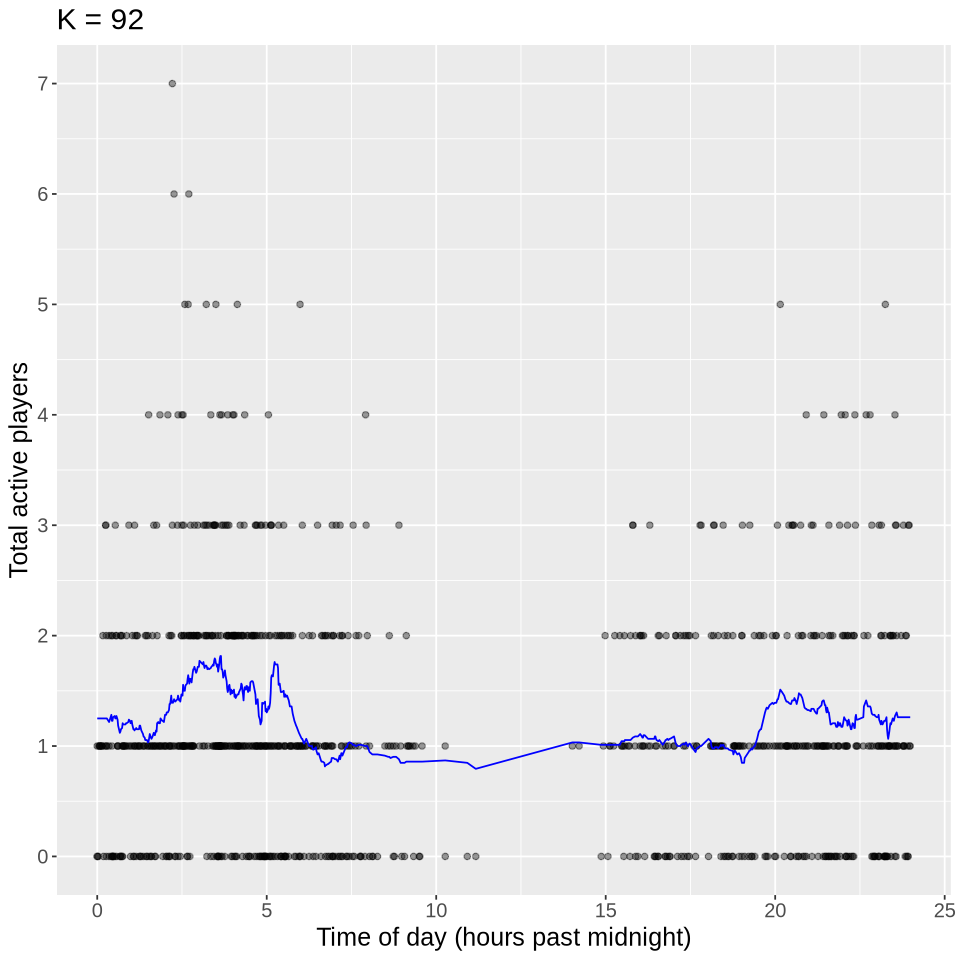

In [31]:
#Part 12: Visualization of KNN regression model
players_pred <- predict(player_fit, player_counts_by_time_test) |>
bind_cols(player_counts_by_time_test)


regression_pred_visual <- players_pred |>
ggplot(aes(x = time_in_hours_past_midnight, y = total_active_players)) +
geom_point(alpha = 0.4) +
geom_line(data = players_pred,
          mapping = aes(x = time_in_hours_past_midnight, y = .pred),
          color = "blue") +
labs(x ="Time of day (hours past midnight)",
     y = "Total active players",
     title = "K = 92") +
scale_y_continuous(breaks = seq(0, max(player_counts_by_time), by = 1)) +
theme(text = element_text(size = 15))
regression_pred_visual

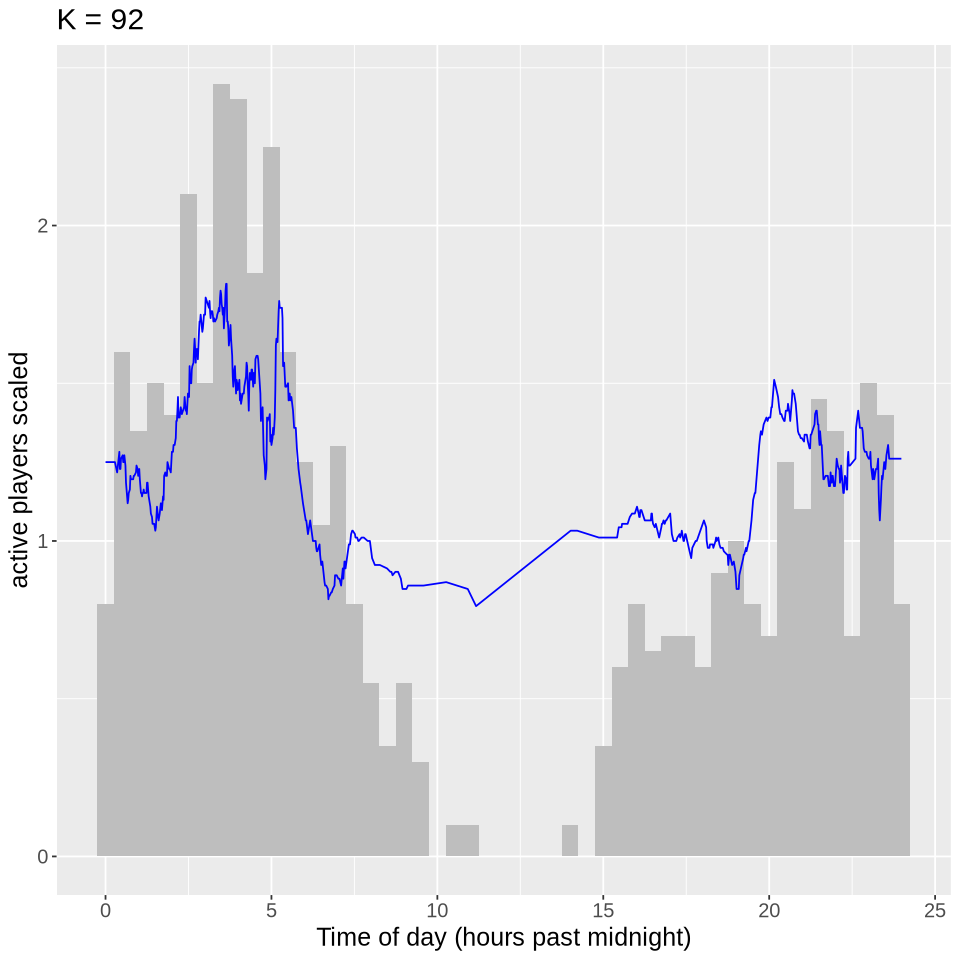

In [34]:
#Part 13: Further Visualization of KNN regression model
players_pred <- predict(player_fit, player_counts_by_time_test) |>
bind_cols(player_counts_by_time_test)


regression_pred_visual <- players_pred |>
ggplot(aes(x = time_in_hours_past_midnight)) +
geom_histogram(binwidth = 0.5, aes(y = ..count.. *0.05), fill = "gray") +
geom_line(data = players_pred,
          mapping = aes(x = time_in_hours_past_midnight, y = .pred),
          color = "blue") +
labs(x ="Time of day (hours past midnight)",
     y = "active players scaled",
     title = "K = 92") +
scale_y_continuous(breaks = seq(0, max(player_counts_by_time), by = 1)) +
theme(text = element_text(size = 15))
regression_pred_visual


# Discussion
## What We've Found


## Impact 

## Future Questions and Further Research


**Data Analysis, Visualization**<br>
Plot shows strong cyclical pattern: active player count is highest late at night/very early in morning with peaks between ~2.5-6 and ~20-23 hours past midnight. Least amount of players present 10-15 hours past midnight.<br>

**Methods/Plan**<br>
*Method:*
- KNN regression

*Rationale/model selection:*
- Numerical response variable: regression chosen over classification
- Non-linear data pattern: KNN regression more appropriate than linear regression

*Assumptions:*
- Points closer to each other are more similar to each other

*Limitations:*
- **Need to account for cyclical nature of time** via sin() and cos() transformations (0 and 23.99 hours-past-midnight should be considered adjacent in time rather than at extreme ends of linear scale like in graph)
- Less accurate extrapolations for times with less data

*Processing:*
- Standardization not needed (Only one predictor: time_in_hours_past_midnight)
- Split data before training: 70% training, 30% testing
- Tuning: best “K”  determined via minimum RMSE of 5-fold cross-validation of training set (model trained on ⅘, validated on ⅕) with different k-values (1-100)
- Model re-trained with ideal K (training set)
- Performance evaluated using test set after training (RMSPE)